<a href="https://colab.research.google.com/github/domshog/Random-Forest-Classifier/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LogisticRegression as SKLR

In [16]:
mean_01 = [0,0]

cov_01 = [[2,0.2], [0.2,1]]

mean_02 = [3,1]

cov_02 = [[1.5,-0.2], [-0.2,2]]

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)

dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


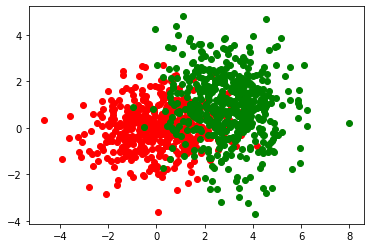

In [17]:
plt.figure()

plt.scatter(dist_01[:,0], dist_01[:,1], color='red')

plt.scatter(dist_02[:,0], dist_02[:,1], color='green')

plt.show()

In [18]:
dataset = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1] + 1))

dataset[:dist_01.shape[0], :-1] = dist_01

dataset[dist_01.shape[0]:, :-1] = dist_02

 

# Red = 0, Green = 1

dataset[dist_02.shape[0]:, -1] = 1

 

dataset.shape


(1000, 3)

In [19]:
np.random.shuffle(dataset)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset[:,:-1], dataset[:,-1], test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [23]:
sk_logreg = SKLR()

sk_logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
sk_logreg.score(X_test, y_test)

0.89